In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Data Standardization

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.duplicated(subset=['host_id', 'host_name']).sum()

np.int64(11438)

In [ ]:
df['price'] = pd.to_numeric(df['price'], errors = 'coerce')

In [ ]:
df['reviews_per_month'] = pd.to_numeric(df['reviews_per_month'], errors = 'coerce')

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'], errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [ ]:
def makenan(value):
  if value <=0:
    return np.nan
  else:
    return value

def makenan1(value):
  if value < 0:
    return np.nan
  else:
    return value

df['price'] = df['price'].apply(makenan)
df['reviews_per_month'] = df['reviews_per_month'].apply(makenan1)
df['number_of_reviews'] = df['number_of_reviews'].apply(makenan1)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].apply(makenan1)
df['availability_365'] = df['availability_365'].apply(makenan1)

In [ ]:
str_col = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']

for col in str_col:
  df[col] = df[col].str.strip().str.lower()

# EDA

##Univariate (numerical)


% of missing values in the price:
0.02249718785151856

descriptive stats for price:
count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

skewness of the price:
19.119026764709606

distribution of the price:


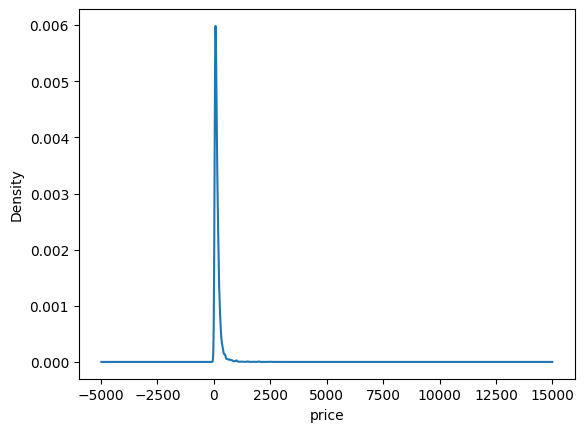


price is not normally distributed

price has 6.08% outliers

% of missing values in the minimum_nights:
0.0

descriptive stats for minimum_nights:
count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

skewness of the minimum_nights:
21.827274529642168

distribution of the minimum_nights:


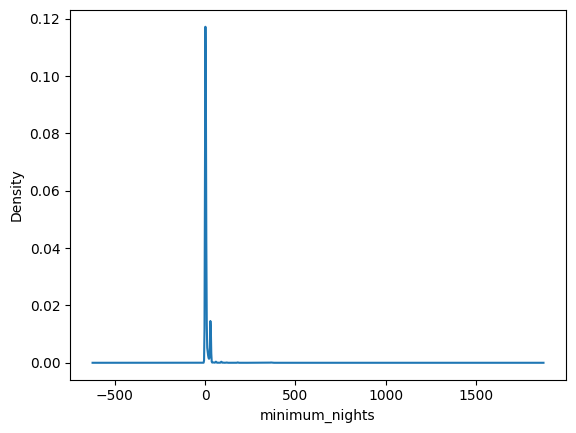


minimum_nights is not normally distributed

minimum_nights has 13.51% outliers

% of missing values in the number_of_reviews:
0.0

descriptive stats for number_of_reviews:
count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

skewness of the number_of_reviews:
3.690634571595388

distribution of the number_of_reviews:


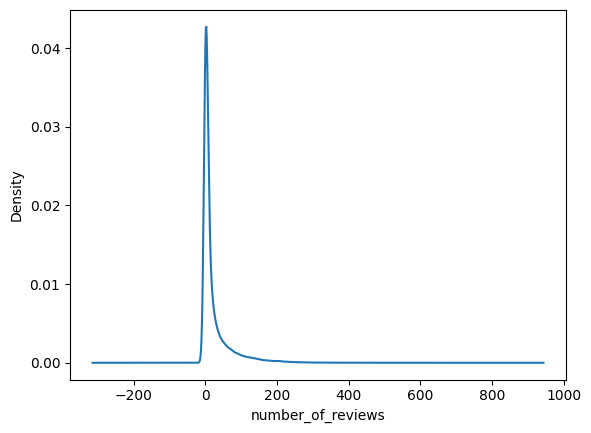


number_of_reviews is not normally distributed

number_of_reviews has 12.31% outliers

% of missing values in the reviews_per_month:
20.55833929849678

descriptive stats for reviews_per_month:
count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

skewness of the reviews_per_month:
3.13018853561771

distribution of the reviews_per_month:


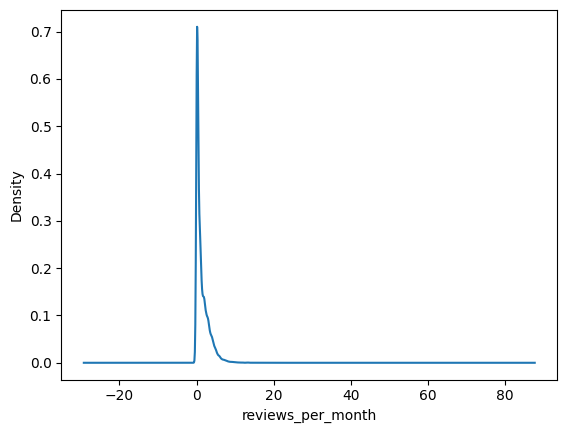


reviews_per_month is not normally distributed

reviews_per_month has 3.67% outliers

% of missing values in the calculated_host_listings_count:
0.0

descriptive stats for calculated_host_listings_count:
count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

skewness of the calculated_host_listings_count:
7.933173899690269

distribution of the calculated_host_listings_count:


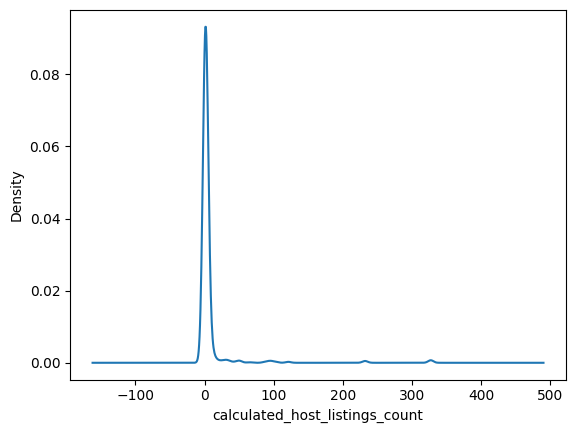


calculated_host_listings_count is not normally distributed

calculated_host_listings_count has 14.48% outliers

% of missing values in the availability_365:
0.0

descriptive stats for availability_365:
count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

skewness of the availability_365:
0.7634075771134318

distribution of the availability_365:


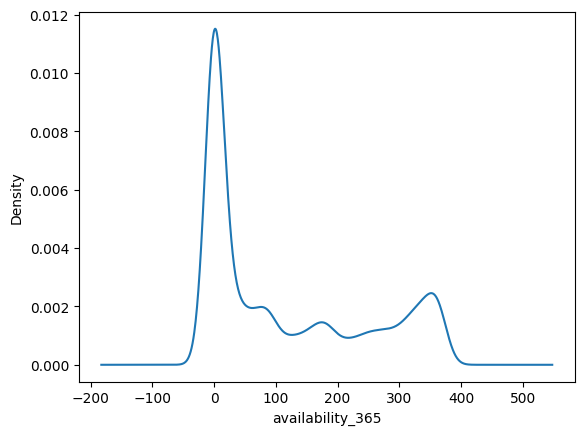


availability_365 is normally distributed

availability_365 has 0.00% outliers


In [ ]:
num_col = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


for col in num_col:
  print(f'\n% of missing values in the {col}:')
  print(df[col].isnull().mean()*100)
  print(f'\ndescriptive stats for {col}:')
  print(df[col].describe())
  print(f'\nskewness of the {col}:')
  print(df[col].skew())
  print(f'\ndistribution of the {col}:')
  df[col].plot(kind='kde')
  plt.xlabel(col)
  plt.show()
  if df[col].skew()<=1 and df[col].skew()>=-1:
    print(f'\n{col} is normally distributed')
    #Z-SCORE METHOD
    min = df[col].mean() - 3*df[col].std()
    max = df[col].mean() + 3*df[col].std()
    df_outlier = df[(df[col] < min) | (df[col] > max)]
    percent_of_outliers = df_outlier.shape[0]*100/df.shape[0]
    print(f'\n{col} has {percent_of_outliers:.2f}% outliers')
  else:
    print(f'\n{col} is not normally distributed')
    #IQR METHOD
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    min = Q1 - 1.5*IQR
    max = Q3 + 1.5*IQR
    df_outlier = df[(df[col] < min) | (df[col] > max)]
    percent_of_outliers = df_outlier.shape[0]*100/df.shape[0]
    print(f'\n{col} has {percent_of_outliers:.2f}% outliers')






##Univariate (categorical)


Number of missing values in name:
0

Number of unique categories in name:
47469

Frequency Distribution of top 10 in name (including 'Other'):
name
Other                                         0.996666
home away from home                           0.000675
private room                                  0.000491
hillside hotel                                0.000368
new york multi-unit building                  0.000327
private room in williamsburg                  0.000286
brooklyn apartment                            0.000266
private room in brooklyn                      0.000266
loft suite @ the box house hotel              0.000225
cozy room                                     0.000225
artsy private br in fort greene cumberland    0.000205
Name: proportion, dtype: float64


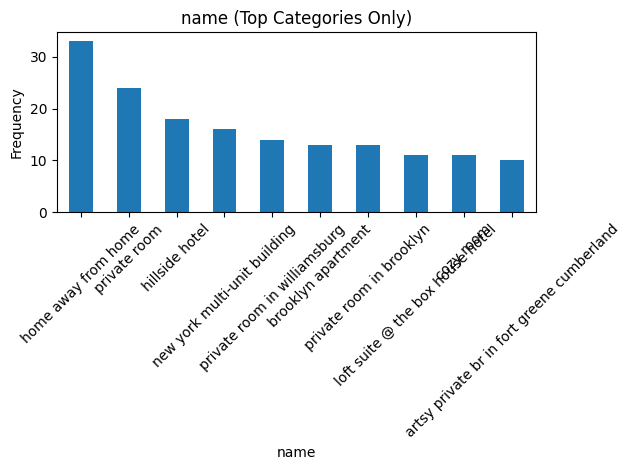


Number of missing values in host_name:
0

Number of unique categories in host_name:
11428

Frequency Distribution of top 10 in host_name (including 'Other'):
host_name
Other           0.942448
michael         0.008528
david           0.008242
sonder (nyc)    0.006688
john            0.006013
alex            0.005706
blueground      0.004745
sarah           0.004643
daniel          0.004622
jessica         0.004193
maria           0.004172
Name: proportion, dtype: float64


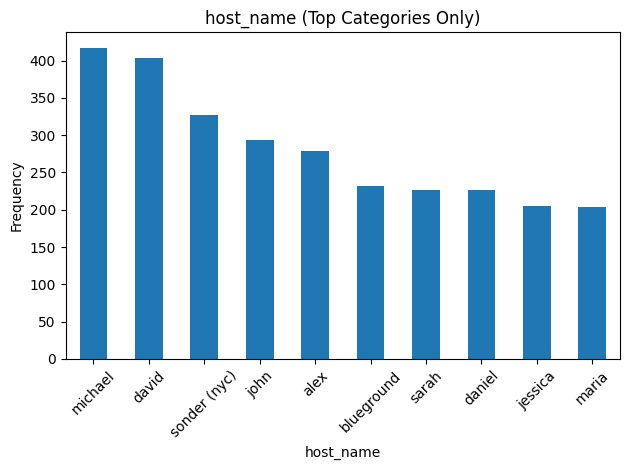


Number of missing values in neighbourhood_group:
0

Number of unique categories in neighbourhood_group:
5

Frequency Distribution of neighbourhood_group:
neighbourhood_group
manhattan        0.443011
brooklyn         0.411167
queens           0.115881
bronx            0.022313
staten island    0.007629
Name: proportion, dtype: float64


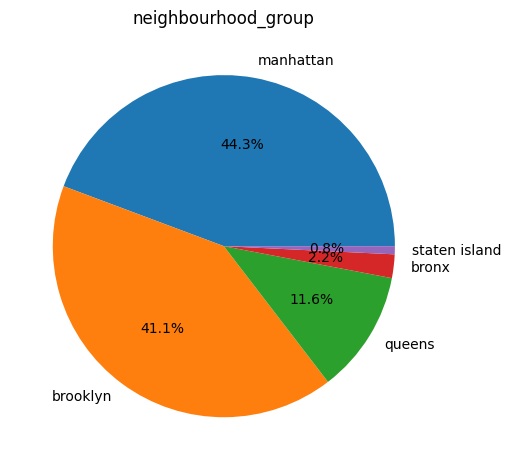


Number of missing values in neighbourhood:
0

Number of unique categories in neighbourhood:
221

Frequency Distribution of top 10 in neighbourhood (including 'Other'):
neighbourhood
Other                 0.520483
williamsburg          0.080172
bedford-stuyvesant    0.075959
harlem                0.054361
bushwick              0.050414
upper west side       0.040311
hell's kitchen        0.040045
east village          0.037898
upper east side       0.036773
crown heights         0.031987
midtown               0.031598
Name: proportion, dtype: float64


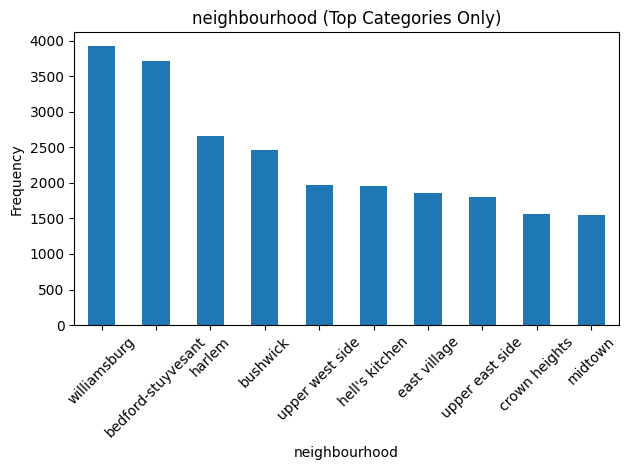


Number of missing values in room_type:
0

Number of unique categories in room_type:
3

Frequency Distribution of room_type:
room_type
entire home/apt    0.519665
private room       0.456611
shared room        0.023724
Name: proportion, dtype: float64


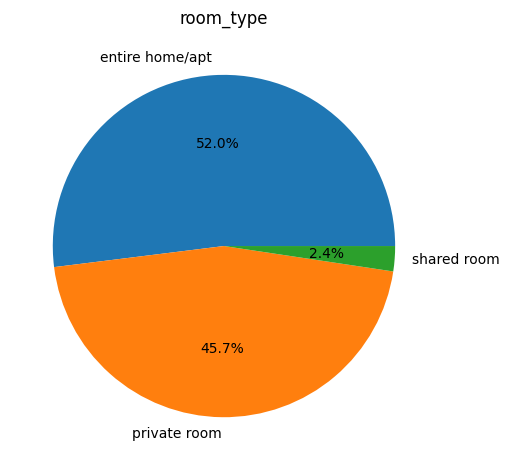

In [ ]:
cat_col = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']

for col in cat_col:
   print(f"\nNumber of missing values in {col}:")
   print(df[df[col]=='missing'][col].count())
   print(f"\nNumber of unique categories in {col}:")
   num_unique = df[col].nunique()
   print(num_unique)


   if num_unique > 10:
        print(f"\nFrequency Distribution of top 10 in {col} (including 'Other'):")

        top10 = df[col].value_counts(normalize=True).nlargest(10)

        temp_col = df[col].apply(lambda x: x if x in top10 else 'Other')

        freq = temp_col.value_counts(normalize=True)
        print(freq)

        plot_data = temp_col[temp_col != 'Other'].value_counts()
        plot_data.plot(kind='bar', title=f"{col} (Top Categories Only)")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        #plt.savefig(f"{col}_CAT_univar.png", dpi=300, bbox_inches="tight")  # save as PNG
        plt.show()

   else:
        print(f"\nFrequency Distribution of {col}:")
        print(df[col].value_counts(normalize=True))
        df[col].value_counts().plot(kind='pie', autopct='%0.1f%%', title=col)
        plt.ylabel("")
        plt.tight_layout()
        plt.savefig(f"{col}_CAT_univar.png", dpi=300, bbox_inches="tight")  # save as PNG
        plt.show()






# Data Cleaning

## i) Handling missing values

In [ ]:
df.dropna(subset=['price'], inplace=True)

In [ ]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)

/tmp/ipython-input-230575574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)


In [ ]:
df['last_review'] = df['last_review'].ffill()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48884 non-null  int64         
 1   name                            48868 non-null  object        
 2   host_id                         48884 non-null  int64         
 3   host_name                       48863 non-null  object        
 4   neighbourhood_group             48884 non-null  object        
 5   neighbourhood                   48884 non-null  object        
 6   latitude                        48884 non-null  float64       
 7   longitude                       48884 non-null  float64       
 8   room_type                       48884 non-null  object        
 9   price                           48884 non-null  float64       
 10  minimum_nights                  48884 non-null  int64         
 11  number_

#Bivariate (numeric-numeric)


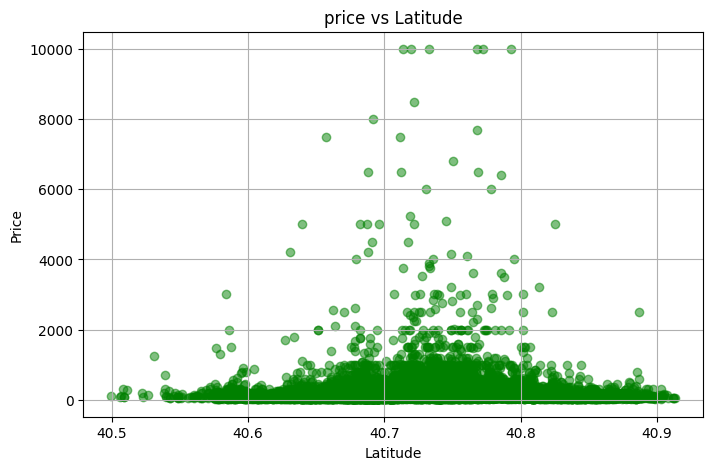

Correlation between latitude and price: 0.03


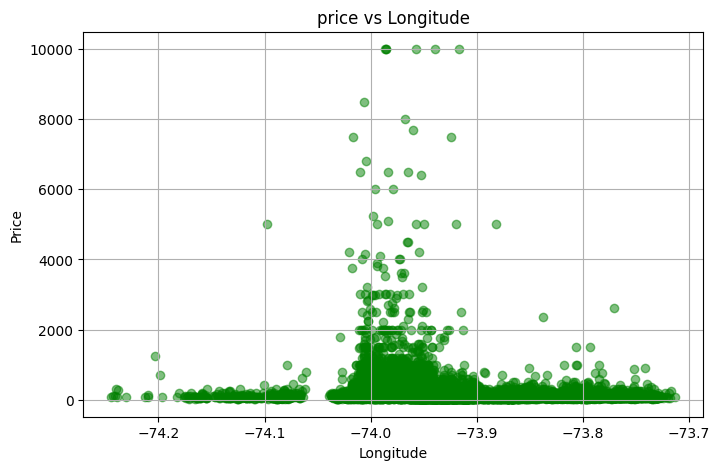

Correlation between longitude and price: -0.15


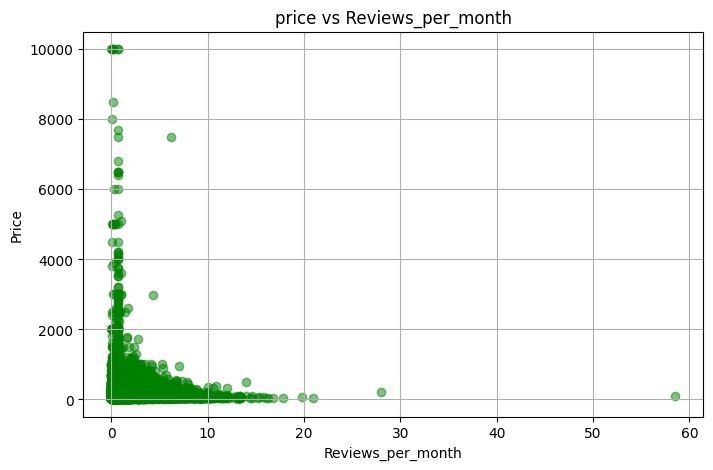

Correlation between reviews_per_month and price: -0.04


In [ ]:
#target column is price
target = 'price'
num_cols = ['latitude', 'longitude', 'reviews_per_month']

for col in num_cols:
  plt.figure(figsize=(8, 5))
  plt.scatter(df[col], df[target], alpha=0.5, color='green')
  plt.title(f'price vs {col.capitalize()}')
  plt.xlabel(col.capitalize())
  plt.ylabel(target.capitalize())
  plt.grid(True)
  #plt.savefig(f"{col}_vs_Price_NUM_NUM.png", dpi=300, bbox_inches="tight")  # save as PNG
  plt.show()
  corr = df[[col, target]].corr().iloc[0,1]
  print(f"Correlation between {col} and {target}: {corr:.2f}")

#Bivariate (numeric-categorical)


Statistical Summary for neighbourhood_group vs price 
                     count    mean  median   min      max     std
neighbourhood_group                                              
manhattan            21660  196.88   150.0  10.0  10000.0  291.39
brooklyn             20095  124.44    90.0  10.0  10000.0  186.90
staten island          373  114.81    75.0  13.0   5000.0  277.62
queens                5666   99.52    75.0  10.0  10000.0  167.10
bronx                 1090   87.58    65.0  10.0   2500.0  106.73


/tmp/ipython-input-243414892.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')


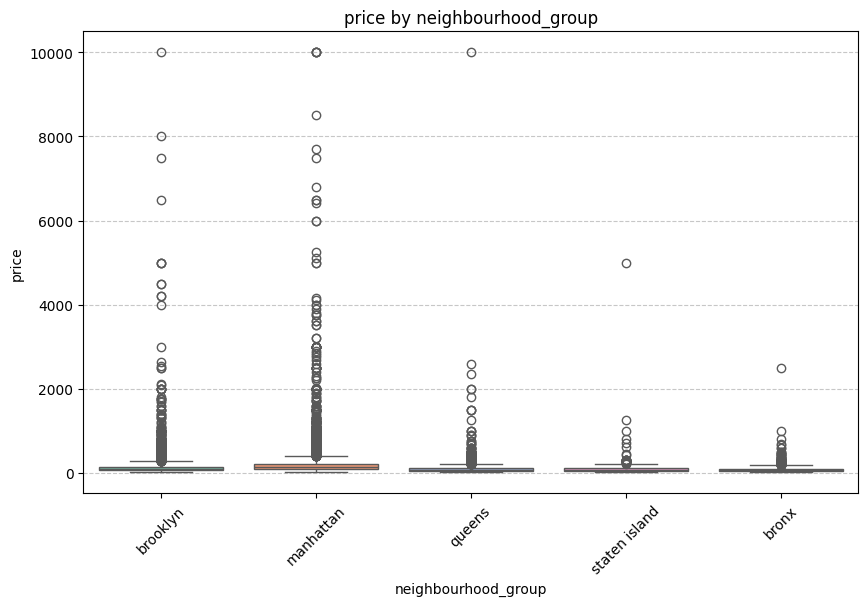


Statistical Summary for room_type vs price 
                 count    mean  median   min      max     std
room_type                                                    
entire home/apt  25407  211.81   160.0  10.0  10000.0  284.05
private room     22319   89.81    70.0  10.0  10000.0  160.22
shared room       1158   70.25    45.0  10.0   1800.0  101.77


/tmp/ipython-input-243414892.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')


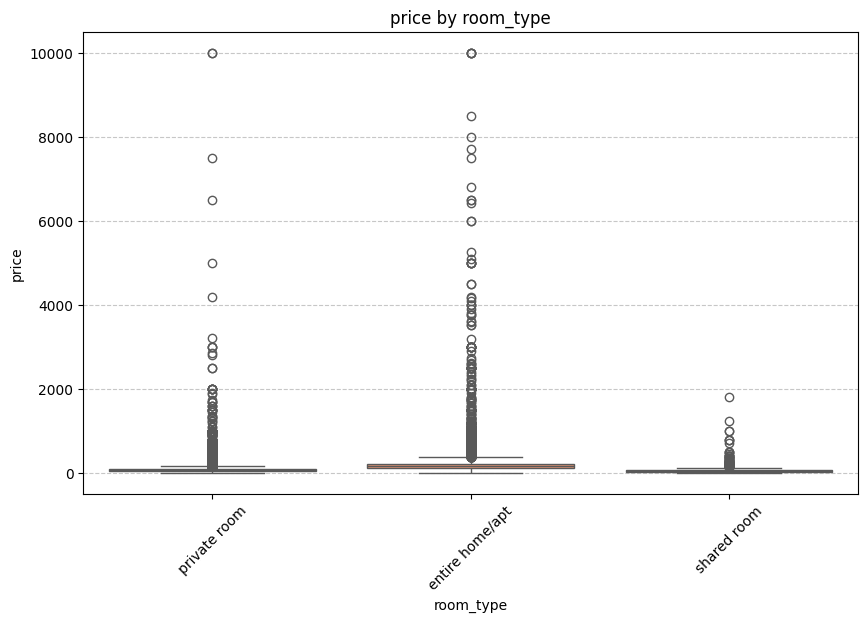


Statistical Summary for neighbourhood vs price 
                    count    mean  median   min      max     std
neighbourhood                                                   
midtown              1545  282.72   210.0  30.0   5100.0  255.33
upper west side      1971  210.92   150.0  10.0  10000.0  395.20
hell's kitchen       1958  204.79   168.0  10.0   4100.0  191.23
upper east side      1798  188.95   149.0  10.0   7703.0  286.71
east village         1853  186.08   150.0  10.0   3750.0  198.71
williamsburg         3919  143.84   105.0  10.0   4500.0  139.90
harlem               2658  118.97    89.0  10.0   5000.0  155.99
crown heights        1564  112.48    85.0  12.0   2500.0  122.38
bedford-stuyvesant   3710  107.79    80.0  10.0   5000.0  165.85
bushwick             2462   84.90    65.0  10.0   2000.0   75.27


/tmp/ipython-input-243414892.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')


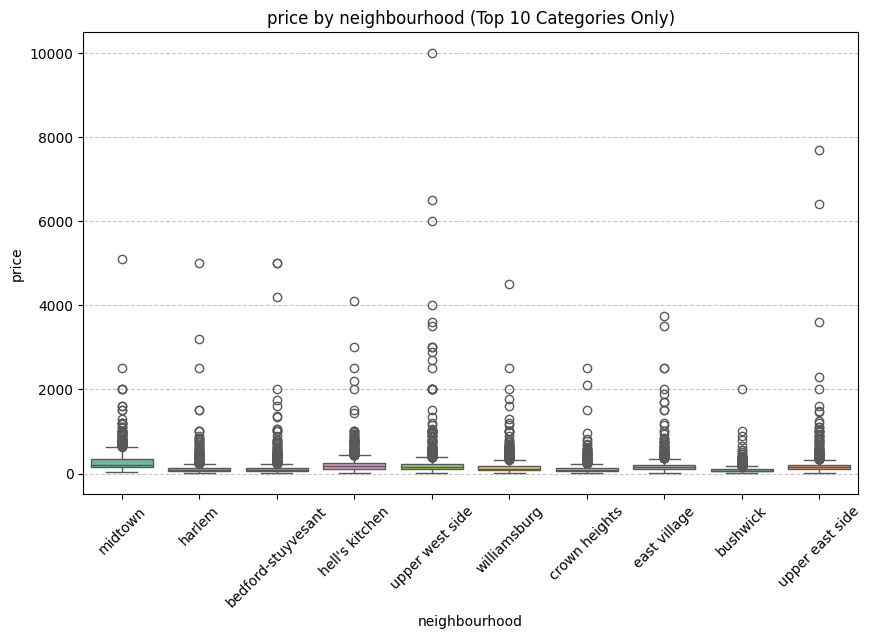

In [ ]:
target = 'price'
cat_cols = ['neighbourhood_group', 'room_type', 'neighbourhood']

for col in cat_cols:
    if df[col].nunique() > 10:
        top10_categories = df[col].value_counts().nlargest(10).index.tolist()
        plot_df = df[df[col].isin(top10_categories)].copy()
        summary = (
        plot_df.groupby(col)[target]
        .agg(['count', 'mean', 'median', 'min', 'max', 'std'])
        .sort_values(by=['mean','count'], ascending=[False,False])
        .round(2)
        )
        print(f"\nStatistical Summary for {col} vs {target} ")
        print(summary)
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')
        plt.title(f'{target} by {col} (Top 10 Categories Only)')
    else:
        plot_df = df.copy()
        summary = (
        plot_df.groupby(col)[target]
        .agg(['count', 'mean', 'median', 'min', 'max', 'std'])
        .sort_values(by=['mean','count'], ascending=[False,False])
        .round(2)
        )
        print(f"\nStatistical Summary for {col} vs {target} ")
        print(summary)
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')
        plt.title(f'{target} by {col}')

    plt.xlabel(col)
    plt.ylabel(target)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    #plt.savefig(f"{col}_vs_profit_CAT_NUM.png", dpi=300, bbox_inches="tight")  # save as PNG
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48884 non-null  int64         
 1   name                            48868 non-null  object        
 2   host_id                         48884 non-null  int64         
 3   host_name                       48863 non-null  object        
 4   neighbourhood_group             48884 non-null  object        
 5   neighbourhood                   48884 non-null  object        
 6   latitude                        48884 non-null  float64       
 7   longitude                       48884 non-null  float64       
 8   room_type                       48884 non-null  object        
 9   price                           48884 non-null  float64       
 10  minimum_nights                  48884 non-null  int64         
 11  number_

In [ ]:
df.to_excel('cleaned_data.xlsx', index=False)


In [ ]:
df['name'].head(5).unique()

array(['clean & quiet apt home by the park', 'skylit midtown castle',
       'the village of harlem....new york !',
       'cozy entire floor of brownstone',
       'entire apt: spacious studio/loft by central park'], dtype=object)